In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import zipfile
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

500
527
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png']


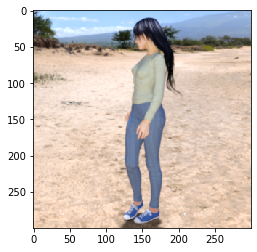

In [5]:
#import image directory
train_direc='horse-or-human'  #main base directory
train_horse_dir=os.path.join(train_direc,'horses')      #training cats
train_human_dir=os.path.join(train_direc,'humans')      #training dogs
print(len(os.listdir(train_horse_dir)))
print(len(os.listdir(train_human_dir)))
human_images=os.listdir(train_human_dir)[0:9]
print(human_images)
human_image=os.path.join(train_human_dir,human_images[0])
image = mpimg.imread(human_image)
plt.imshow(image)

In [28]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid') 
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 33, 33, 32)       

In [29]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_direc,
                                                    batch_size=64,
                                                    class_mode='binary',
                                                    target_size=(300, 300)
                                                                        )     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
#validation_generator =  test_datagen.flow_from_directory(validation_dir,
#                                                        batch_size=20,
#                                                       class_mode  = 'binary',
#                                                      target_size = (150, 150))

Found 4036 images belonging to 2 classes.


In [31]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              steps_per_epoch=32,
                              verbose=1)

Epoch 1/10
32/32 [==============================] - 127s 4s/step - loss: 0.7414 - accuracy: 0.5176
Epoch 2/10
32/32 [==============================] - 125s 4s/step - loss: 0.6900 - accuracy: 0.5332
Epoch 3/10
32/32 [==============================] - 122s 4s/step - loss: 0.6962 - accuracy: 0.5407
Epoch 4/10
32/32 [==============================] - 125s 4s/step - loss: 0.6897 - accuracy: 0.6104
Epoch 5/10
32/32 [==============================] - 130s 4s/step - loss: 0.6526 - accuracy: 0.6333
Epoch 6/10
32/32 [==============================] - 144s 5s/step - loss: 0.6848 - accuracy: 0.6367
Epoch 7/10
32/32 [==============================] - 130s 4s/step - loss: 0.6079 - accuracy: 0.6621
Epoch 8/10
32/32 [==============================] - 98s 3s/step - loss: 0.5960 - accuracy: 0.6801
Epoch 9/10
32/32 [==============================] - 102s 3s/step - loss: 0.5620 - accuracy: 0.7173
Epoch 10/10
32/32 [==============================] - 108s 3s/step - loss: 0.5491 - accuracy: 0.7261


In [32]:
a=history.history['accuracy']


In [33]:
a

[0.51760566,
 0.5332031,
 0.5407445,
 0.61035156,
 0.6332998,
 0.63671875,
 0.6621094,
 0.6800805,
 0.7173038,
 0.7260742]

In [35]:
loss=history.history['loss']

In [36]:
loss

[0.742637567596896,
 0.6899670958518982,
 0.6962625622989186,
 0.6897149384021759,
 0.6591984376581143,
 0.6847913227975368,
 0.607947526499629,
 0.5973149438499205,
 0.5631464259245506,
 0.5491243042051792]

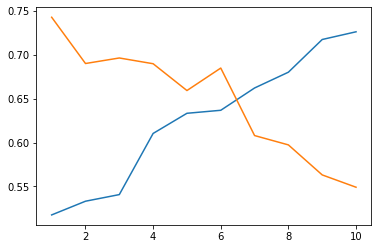

In [37]:
plt.plot(list(range(1,11)),a)
plt.plot(list(range(1,11)),loss)